# Content Based Book Recommender

<img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Charles_Darwin_by_Julia_Margaret_Cameron.jpg" title="Charles Darwin">

Problem: Can we automatically detect how closely related Charles Darwin's books are to each other?<br>
Task: to develop the bases of a content-based book recommendation system, which will determine which books are close to each other based on how similar the discussed topics are

## Data import
The books files are contained in .txt files in the dataset folder

In [1]:
import glob

folder = "datasets/"

files = glob.glob(folder + "*.txt")
files.sort()
files

['datasets\\Autobiography.txt',
 'datasets\\CoralReefs.txt',
 'datasets\\DescentofMan.txt',
 'datasets\\DifferentFormsofFlowers.txt',
 'datasets\\EffectsCrossSelfFertilization.txt',
 'datasets\\ExpressionofEmotionManAnimals.txt',
 'datasets\\FormationVegetableMould.txt',
 'datasets\\FoundationsOriginofSpecies.txt',
 'datasets\\GeologicalObservationsSouthAmerica.txt',
 'datasets\\InsectivorousPlants.txt',
 'datasets\\LifeandLettersVol1.txt',
 'datasets\\LifeandLettersVol2.txt',
 'datasets\\MonographCirripedia.txt',
 'datasets\\MonographCirripediaVol2.txt',
 'datasets\\MovementClimbingPlants.txt',
 'datasets\\OriginofSpecies.txt',
 'datasets\\PowerMovementPlants.txt',
 'datasets\\VariationPlantsAnimalsDomestication.txt',
 'datasets\\VolcanicIslands.txt',
 'datasets\\VoyageBeagle.txt']

In [2]:
import re, os

txts = []
titles = []

for n in files:
    f = open(n, encoding='utf-8-sig')
    data = re.sub('[\W_]+', ' ', f.read())
    txts.append(data)
    titles.append(os.path.basename(n).replace(".txt", ""))

[len(t) for t in txts]

[123231,
 496068,
 1776539,
 617088,
 913713,
 624232,
 335920,
 523021,
 797401,
 901406,
 1047518,
 1010643,
 767492,
 1660866,
 298319,
 916267,
 1093567,
 1043499,
 341447,
 1149574]

## Find a book

We will check the results returned by our method for a given book. For baseline, we will refer to Darwin's most famous book: "On the Origin of Species"

In [3]:
for i in range(len(titles)):
    if titles[i] == "OriginofSpecies":
        ori = i

print(str(ori))

15


## Tokenization 

For testing, I will print the first 20 tokens of "On the Origin of Species" book

In [4]:
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

txts_lower_case = [txt.lower() for txt in txts]

txts_split = [txt.split() for txt in txts_lower_case]

texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

texts[ori][0:20]

['on',
 'origin',
 'species',
 'but',
 'with',
 'regard',
 'material',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'this',
 'can',
 'perceive',
 'events',
 'are',
 'brought',
 'about']

## Stemming

As we have 20 full books, for testing, I will print the 20 first stemmed tokens from the "On the Origin of Species" book

In [5]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

texts_stem = [[porter.stem(token) for token in text] for text in texts]

texts_stem[0:20]

[['autobiographi',
  'charl',
  'darwin',
  'from',
  'life',
  'letter',
  'charl',
  'darwin',
  'by',
  'charl',
  'darwin',
  'edit',
  'by',
  'hi',
  'son',
  'franci',
  'darwin',
  'father',
  's',
  'autobiograph',
  'recollect',
  'given',
  'present',
  'chapter',
  'were',
  'written',
  'hi',
  'children',
  'written',
  'without',
  'ani',
  'thought',
  'they',
  'would',
  'ever',
  'publish',
  'mani',
  'thi',
  'seem',
  'an',
  'imposs',
  'but',
  'those',
  'knew',
  'father',
  'will',
  'understand',
  'how',
  'it',
  'wa',
  'not',
  'onli',
  'possibl',
  'but',
  'natur',
  'autobiographi',
  'bear',
  'head',
  'recollect',
  'develop',
  'mind',
  'charact',
  'end',
  'with',
  'follow',
  'note',
  'aug',
  '3',
  '1876',
  'thi',
  'sketch',
  'life',
  'wa',
  'begun',
  'about',
  '28th',
  'hopeden',
  'mr',
  'hensleigh',
  'wedgwood',
  's',
  'hous',
  'surrey',
  'sinc',
  'then',
  'have',
  'written',
  'nearli',
  'an',
  'hour',
  'on',
  'mo

## Building a bag-of-words model

For testing, I will print the 5 first elements of one of the "On the Origin of Species" BoW model

In [6]:
from gensim import corpora

dictionary = corpora.Dictionary(texts_stem)

bows = [dictionary.doc2bow(text) for text in texts_stem]

bows[ori][0:5]

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

## The most common words of a given book
I will display the 10 most common stems for the book "On the Origin of Species"

In [7]:
import pandas as pd

df_bow_origin = pd.DataFrame(bows[ori])

df_bow_origin.columns = ["index", "occurrences"]

df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

df_bow_origin.sort_values(by = "occurrences", ascending = False).head(10)

index  occurrences  token
748    1168         2023   have
1119   1736         1558     on
1489   2288         1543  speci
892    1366         1480     it
239     393         1362     by
1128   1747         1201     or
125     218         1140    are
665    1043         1137   from
1774   2703         1000   with
1609   2452          962    thi

## Tf-idf model
The most recurring words are, apart from few exceptions, very common and unlikely to carry any information peculiar to the given book. Hence,  we will use a tf-idf model (term frequency–inverse document frequency)<br>
It defines the importance of each word depending on how frequent it is in this text and how infrequent it is in all the other documents<br>
I will print the 10 words most specific to the "On the Origin of Species" book

In [8]:
from gensim.models import TfidfModel

model = TfidfModel(bows)

model[bows[ori]]

[(8, 0.00020408683039616044),
 (21, 0.0005723177174474165),
 (23, 0.001714008058633542),
 (27, 0.0006466337090765656),
 (28, 0.0025710120879503125),
 (31, 0.000857004029316771),
 (35, 0.001016241827361025),
 (36, 0.001016241827361025),
 (51, 0.0008878482198272165),
 (54, 0.00203248365472205),
 (56, 0.0023786863377481767),
 (57, 0.00010204341519808022),
 (63, 0.0027579084706411254),
 (64, 0.000510217075990401),
 (66, 0.00020408683039616044),
 (67, 0.0023786863377481767),
 (68, 0.00203248365472205),
 (75, 0.0013789542353205627),
 (76, 0.00044392410991360827),
 (78, 0.004177054182752995),
 (80, 0.0020885270913764977),
 (83, 0.008584765761711247),
 (84, 0.000510217075990401),
 (88, 0.0024490419647539255),
 (89, 0.0033674327015366474),
 (90, 0.0008878482198272165),
 (91, 0.0016768424759030323),
 (94, 0.0008878482198272165),
 (95, 0.00044392410991360827),
 (96, 0.003551392879308866),
 (97, 0.0016326946431692835),
 (102, 0.03773354934265671),
 (104, 0.0009183907367827219),
 (106, 0.0014191457

In [9]:
df_tfidf = pd.DataFrame(model[bows[ori]])

df_tfidf.columns = ["id", "score"]
df_tfidf["token"] = [dictionary[i] for i in list(df_tfidf["id"])]

df_tfidf.sort_values(by = "score", ascending = False).head(10)

id     score      token
880    2164  0.327823     select
3103  10108  0.204162     pigeon
128     369  0.197968      breed
2985   9395  0.167705     migrat
947    2325  0.148371     steril
285     752  0.146172     domest
504    1255  0.128433     hybrid
371     966  0.127694     fertil
3840  16046  0.124547    gärtner
3536  12729  0.121348  naturalis

## Calculate similarity distance

To measure how related to books are between each other, we will calculate the cosine similarity distance for all books

In [10]:
from gensim import similarities

sims = similarities.MatrixSimilarity(model[bows])

sim_df = pd.DataFrame(list(sims))
sim_df.columns = titles
sim_df.index = titles

sim_df

Autobiography  CoralReefs  DescentofMan  \
Autobiography                             1.000000    0.049722      0.080789   
CoralReefs                                0.049722    1.000000      0.009516   
DescentofMan                              0.080789    0.009516      1.000000   
DifferentFormsofFlowers                   0.066615    0.001980      0.072792   
EffectsCrossSelfFertilization             0.077006    0.001936      0.029997   
ExpressionofEmotionManAnimals             0.089345    0.005062      0.148642   
FormationVegetableMould                   0.041182    0.029445      0.027106   
FoundationsOriginofSpecies                0.058990    0.022066      0.135001   
GeologicalObservationsSouthAmerica        0.030679    0.060744      0.009628   
InsectivorousPlants                       0.014945    0.002284      0.009468   
LifeandLettersVol1                        0.399534    0.031211      0.060040   
LifeandLettersVol2                        0.220023    0.017772      0.080569   
MonographCirripedia                       0.005854    0.006321      0.053426   
MonographCirripediaVol2                   0.008456    0.010497      0.042937   
MovementClimbingPlants                    0.022999    0.001534      0.005157   
OriginofSpecies                           0.101199    0.039200      0.267734   
PowerMovementPlants                       0.016059    0.002686      0.011267   
VariationPlantsAnimalsDomestication       0.048989    0.011383      0.228437   
VolcanicIslands                           0.038630    0.057402      0.007885   
VoyageBeagle                              0.184288    0.267414      0.123902   

                                     DifferentFormsofFlowers  \
Autobiography                                       0.066615   
CoralReefs                                          0.001980   
DescentofMan                                        0.072792   
DifferentFormsofFlowers                             1.000000   
EffectsCrossSelfFertilization                       0.391788   
ExpressionofEmotionManAnimals                       0.006545   
FormationVegetableMould                             0.010621   
FoundationsOriginofSpecies                          0.039993   
GeologicalObservationsSouthAmerica                  0.002855   
InsectivorousPlants                                 0.007487   
LifeandLettersVol1                                  0.016188   
LifeandLettersVol2                                  0.046692   
MonographCirripedia                                 0.009403   
MonographCirripediaVol2                             0.005451   
MovementClimbingPlants                              0.008165   
OriginofSpecies                                     0.129152   
PowerMovementPlants                                 0.018831   
VariationPlantsAnimalsDomestication                 0.049405   
VolcanicIslands                                     0.002624   
VoyageBeagle                                        0.013213   

                                     EffectsCrossSelfFertilization  \
Autobiography                                             0.077006   
CoralReefs                                                0.001936   
DescentofMan                                              0.029997   
DifferentFormsofFlowers                                   0.391788   
EffectsCrossSelfFertilization                             1.000000   
ExpressionofEmotionManAnimals                             0.006871   
FormationVegetableMould                                   0.032270   
FoundationsOriginofSpecies                                0.040248   
GeologicalObservationsSouthAmerica                        0.002247   
InsectivorousPlants                                       0.006763   
LifeandLettersVol1                                        0.019609   
LifeandLettersVol2                                        0.046567   
MonographCirripedia                                       0.003218   
MonographCirripediaVol2        

## The book most similar to "On the Origin of Species"

As a first step, I will display which books are the most similar to the book "On the Origin of Species" with a bar chart 

Text(0.5, 1.0, "Most similar books to 'On the Origin of Species'")

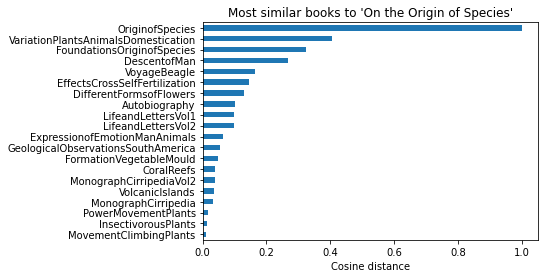

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

v = sim_df["OriginofSpecies"]

v_sorted = v.sort_values(ascending = True)

v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'On the Origin of Species'")

From the bar chart, we can see that if you enjoyed "On the Origin of Species," you can read books discussing similar concepts such as "The Variation of Animals and Plants under Domestication" or "The Descent of Man, and Selection in Relation to Sex." 

## Visually inspect similarity with dendrogram

Now we will see how Darwin's books are generally related to each other (in terms of topics discussed)

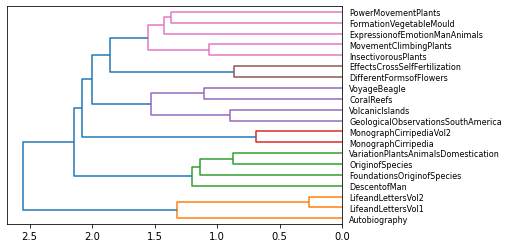

In [12]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(sim_df, 'ward')

a = hierarchy.dendrogram(Z,  leaf_font_size=8, labels=sim_df.index,  orientation="left")